<h3>Name: Nguyen Van Hau <br> <br>
Student ID: 2111167 </h3>

# NLP Assignment: Sentiment Analysis - VLSP Dataset

## 1 Set up environment

### 1.1 For Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

NotImplementedError: Mounting drive is unsupported in this environment. Use PyDrive instead. See examples at https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2.

### 1.2 For Kaggle

In [1]:
#Setup Gdrive file download extention 
!pip install gdown

Download train set/test set/word2vec model:

In [2]:
!gdown --id 1FiQSFJSiRBO_J4rYfZ94peoMv3x-Dup3 # vlsp_sentiment_train.csv
!gdown --id 1uruxz2CcconYmJNgGr_qL6t5nUwfkaST # vlsp_sentiment_test.csv
!gdown --id 1uCGz-aM9NgrF1d2hLcXeAkjoN9YqNO8j # vi-model-CBOW.bin

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FiQSFJSiRBO_J4rYfZ94peoMv3x-Dup3
To: /kaggle/working/vlsp_sentiment_train.csv
100%|█████████████████████████████████████████| 858k/858k [00:00<00:00, 120MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1uruxz2CcconYmJNgGr_qL6t5nUwfkaST
To: /kaggle/working/vlsp_sentiment_test.csv
100%|████████████████████████████████████████| 159k/159k [00:00<00:00, 92.6MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be

### 1.3 Download neccessary libraries

In [3]:
!pip install underthesea
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 74.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 47.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4

**This is the solution for the tensorflow conflict on numpy 1.26.4, can skip if the below importing libraries are not got any error (don't run this at first)**

In [ ]:
# # 1. Uninstall everything (including hidden dependencies)
# !pip uninstall numpy tensorflow -y
# !pip install --upgrade --force-reinstall numpy==1.26.4

# # 2. Install TensorFlow 2.15 (latest stable version compatible with NumPy 1.26.4)
# !pip install tensorflow==2.15.0

# # 3. Restart the runtime (MUST DO THIS)
# import os
# os.kill(os.getpid(), 9)  # Force-restart

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires tensorflow>=2.2.0, which is not installed.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 26.8 MB/s eta 0:00:00
   ━━━━━

### 1.4 Import libraries

In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
from string import digits
from collections import Counter
from underthesea import word_tokenize
from gensim.models.word2vec import Word2Vec
from keras.utils import to_categorical
%matplotlib inline

2025-04-23 09:24:22.419037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745400262.630691      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745400262.690231      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### 1.5 Mount folder from drive to colab (skip if running on Kaggle or local environment)

In [4]:
!cp -r "/content/drive/MyDrive/HCMUT_POSTGRAD_242/Sentiment_Analysis" /content

In [5]:
%cd "/content/Sentiment_Analysis"

/content/Sentiment_Analysis


## 2 Implementation

### 2.1 Read the VLSP dataset

In [5]:
data_train = pd.read_csv("vlsp_sentiment_train.csv", sep='\t')
data_train.columns = ['Class', 'Data']
data_test = pd.read_csv("vlsp_sentiment_test.csv", sep='\t')
data_test.columns = ['Class', 'Data']

In [6]:
print(data_train.shape)
print(data_test.shape)

(5100, 2)
(1050, 2)


### 2.2 Data Preprocessing

In [7]:
labels = data_train.iloc[:, 0].values
reviews = data_train.iloc[:, 1].values

In [8]:
encoded_labels = []

for label in labels:
    if label == -1:
        encoded_labels.append([1,0,0])
    elif label == 0:
        encoded_labels.append([0,1,0])
    else:
        encoded_labels.append([0,0,1])

encoded_labels = np.array(encoded_labels)

In [9]:
reviews_processed = []
for review in reviews:
    review_cool_one = ''.join([char for char in review if char not in digits])
    reviews_processed.append(review_cool_one)

In [10]:
# Use Underthesea for Vietnamese word tokenizer
word_reviews = []
for review in reviews_processed:
    review = word_tokenize(review.lower())
    word_reviews.append(review)

In [11]:
EMBEDDING_DIM = 400 # how big is each word vector
MAX_VOCAB_SIZE = 10000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 300 # max number of words in a comment to use

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [13]:
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, lower=True, char_level=False)
tokenizer.fit_on_texts(word_reviews)
sequences_train = tokenizer.texts_to_sequences(word_reviews)
word_index = tokenizer.word_index

In [14]:
data = pad_sequences(sequences_train, maxlen=MAX_SEQUENCE_LENGTH)
labels = encoded_labels

In [21]:
print('Shape of X train and X validation tensor:', data.shape)
print('Shape of label train and validation tensor:', labels.shape)

Shape of X train and X validation tensor: (5100, 300)
Shape of label train and validation tensor: (5100, 3)


In [15]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('vi-model-CBOW.bin', binary=True)

vocabulary_size=min(len(word_index)+1,MAX_VOCAB_SIZE)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
print("vocab size", vocabulary_size)
for word, i in word_index.items():
    if i>=MAX_VOCAB_SIZE:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

vocab size 10000


I0000 00:00:1745400388.860990      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745400388.861692      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


### LSTM 

In [73]:
from keras.models import Model
from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import AdamW
from keras.models import Model
from keras import regularizers
from keras import backend as K
sequence_length = data.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

x = SpatialDropout1D(0.2)(embedding)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(x)

lstm_2 = Bidirectional(LSTM(512, return_sequences=True))(reshape)
lstm_1 = Bidirectional(LSTM(256, return_sequences=True))(lstm_2)
lstm_0 = Bidirectional(LSTM(128))(lstm_1)

dropout = Dropout(drop)(lstm_0)
output = Dense(units=3, activation='softmax', kernel_regularizer=regularizers.l2(0.02))(dropout)

model = Model(inputs, output)

adam = AdamW(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 300, 400)            │       4,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_10                 │ (None, 300, 400)            │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_9 (Reshape)                  │ (None, 300, 400)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 300, 1024)           │       3,739,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_9 (Bidirectional)      │ (None, 300, 512)            │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,020,291 (42.04 MB)

 Trainable params: 11,020,291 (42.04 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

model.fit(data, labels, validation_split=0.1,
          epochs=20, batch_size=256, shuffle=True, callbacks=callbacks_list)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.4094 - loss: 1.1894 - val_accuracy: 0.2451 - val_loss: 1.3569
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5326 - loss: 1.0774 - val_accuracy: 0.4235 - val_loss: 1.2152
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6174 - loss: 0.9789 - val_accuracy: 0.1902 - val_loss: 1.4805
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6367 - loss: 0.9299 - val_accuracy: 0.3314 - val_loss: 1.3535
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6827 - loss: 0.8590 - val_accuracy: 0.2686 - val_loss: 1.5323
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7130 - loss: 0.7933 - val_accuracy: 0.5686 - val_loss: 1.0391
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7251 - loss: 0.7842 - val_accuracy: 0.5059 - val_loss: 1.1180
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7311 - loss: 0.7428 - val_accuracy: 0.4667 - val_loss:

In [40]:
labels_test = data_test.iloc[:, 0].values
reviews_test = data_test.iloc[:, 1].values

In [41]:
encoded_labels_test = []

for label_test in labels_test:
    if label_test == -1:
        encoded_labels_test.append([1,0,0])
    elif label_test == 0:
        encoded_labels_test.append([0,1,0])
    else:
        encoded_labels_test.append([0,0,1])

encoded_labels_test = np.array(encoded_labels_test)

In [42]:
reviews_processed_test = []
for review_test in reviews_test:
    review_cool_one = ''.join([char for char in review_test if char not in digits])
    reviews_processed_test.append(review_cool_one)

In [43]:
# Use underthesea for Vietnamese word tokenizer
word_reviews_test = []
for review_test in reviews_processed_test:
    review_test = word_tokenize(review_test.lower())
    word_reviews_test.append(review_test)

In [75]:
sequences_test = tokenizer.texts_to_sequences(word_reviews_test)
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
labels_test = encoded_labels_test

In [76]:
print('Shape of X train and X validation tensor:',data_test.shape)
print('Shape of label train and validation tensor:', labels_test.shape)

Shape of X train and X validation tensor: (1050, 300)
Shape of label train and validation tensor: (1050, 3)


In [77]:
score = model.evaluate(data_test, labels_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.6441 - loss: 0.9205


In [78]:
print("%s: %.2f" % (model.metrics_names[0], score[0]))
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

loss: 0.94
compile_metrics: 64.29%


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step
True labels seem to be one-hot encoded. Converting to single dimension.

Accuracy: 0.6429

--- Averaged Metrics ---
Precision (Macro): 0.6436
Recall (Macro):    0.6429
F1-score (Macro):  0.6432
--------------------
Precision (Weighted): 0.6436
Recall (Weighted):    0.6429
F1-score (Weighted):  0.6432
--------------------

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.64      0.64      0.64       350
           1       0.59      0.60      0.59       350
           2       0.71      0.69      0.70       350

    accuracy                           0.64      1050
   macro avg       0.64      0.64      0.64      1050
weighted avg       0.64      0.64      0.64      1050


--- Confusion Matrix ---
[[223  87  40]
 [ 79 210  61]
 [ 48  60 242]]


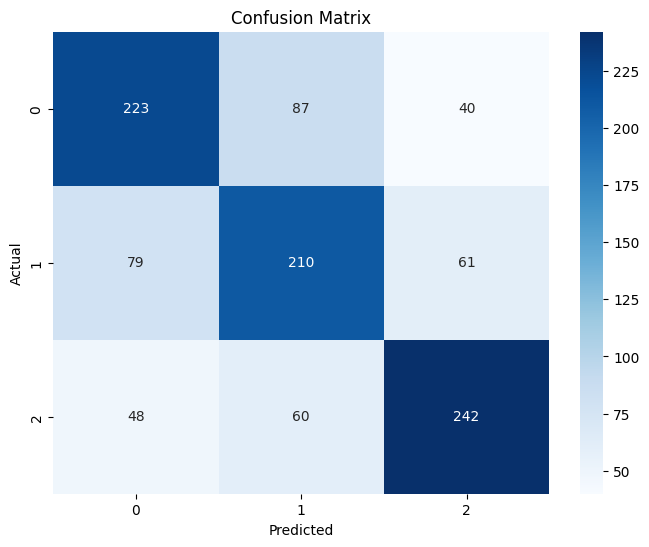

In [79]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns 
import matplotlib.pyplot as plt 

# 1. Get raw probability predictions from the model
y_pred_probabilities = model.predict(data_test)

# 2. Convert probabilities to class predictions (index of the highest probability)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# 3. Get true labels in the same format (if they are one-hot encoded)
# Check if labels_test is one-hot encoded (e.g., shape like [num_samples, 3])
if labels_test.ndim > 1 and labels_test.shape[1] > 1:
    print("True labels seem to be one-hot encoded. Converting to single dimension.")
    y_true = np.argmax(labels_test, axis=1)
else:
    # Assume labels_test is already a 1D array of class indices
    print("True labels seem to be single dimension.")
    y_true = labels_test # Use directly if already in the format [0, 1, 2, ...]

# --- Calculate and Print Metrics ---

# 4. Accuracy (should match model.evaluate if calculated the same way)
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 5. Precision, Recall, F1-score (Micro, Macro, Weighted Averages)
# 'macro': Calculate metrics for each label, and find their unweighted mean. Treats all classes equally.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). Accounts for class imbalance.
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives. Good overall measure.
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro') # Note: Micro P, R, F1 are all equal to accuracy for multi-class

print("\n--- Averaged Metrics ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")
print("-" * 20)
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")
print("-" * 20)
# Micro average is usually less informative for balanced datasets but included for completeness
# print(f"Precision (Micro): {precision_micro:.4f}")
# print(f"Recall (Micro):    {recall_micro:.4f}")
# print(f"F1-score (Micro):  {f1_micro:.4f}")


# 6. Classification Report (provides per-class metrics and averages)
print("\n--- Classification Report ---")
# You might need class names if you have them, otherwise it uses 0, 1, 2...
# target_names = ['class_0_name', 'class_1_name', 'class_2_name'] # Optional: Replace with your actual class names
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred)) # Without specific names


# 7. Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Optional: Plot Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # fmt='d' displays integers
            # xticklabels=target_names, yticklabels=target_names # Uncomment if you have target_names
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## LSTM With Attention

In [35]:
from keras.models import Model
from keras.layers import *
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras import regularizers
from keras import backend as K
sequence_length = data.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)

x = SpatialDropout1D(0.2)(embedding)

reshape = Reshape((sequence_length,EMBEDDING_DIM))(x)

lstm_2 = Bidirectional(LSTM(512, return_sequences=True))(reshape)
lstm_1 = Bidirectional(LSTM(256, return_sequences=True))(lstm_2)
lstm_0 = Bidirectional(LSTM(128, return_sequences=True))(lstm_1)

attention_dense_1 = Dense(units=lstm_0.shape[-1], activation='tanh', name='attention_dense_1')(lstm_0)
attention_scores = Dense(units=1, activation='linear', name='attention_scores')(attention_dense_1)

attention_weights = Activation('softmax', name='attention_weights')(attention_scores) # Softmax applied across timesteps (axis=1)

context_vector = Multiply()([lstm_0, attention_weights])
context_vector = Lambda(lambda T: tf.reduce_sum(T, axis=1),
                        output_shape=(lstm_0.shape[-1],), # Output shape is (features,)
                        name='attention_context_vector')(context_vector)

# --- Classification Head ---
# Dropout before the final layer
dropout = Dropout(drop)(context_vector) # Apply dropout to the context vector

# Final Dense layer
output = Dense(units=3, activation='softmax',
               kernel_regularizer=regularizers.l2(0.01), name='output_layer')(dropout)

# this creates a model that includes
model = Model(inputs, output)

adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 300)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 300, 400)       │      4,000,000 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ spatial_dropout1d_1       │ (None, 300, 400)       │              0 │ embedding[2][0]        │
│ (SpatialDropout1D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 300, 400)       │              0 │ spatial_dropout1d_1[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_1           │ (None, 300, 1024)      │      3,739,648 │ reshape_2[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_2           │ (None, 300, 512)       │      2,623,488 │ bidirectional_1[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_3           │ (None, 300, 256)       │        656,384 │ bidirectional_2[0][0]  │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_dense_1 (Dense) │ (None, 300, 256)       │         65,792 │ bidirectional_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_scores (Dense)  │ (None, 300, 1)         │            257 │ attention_dense_1[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_weights         │ (None, 300, 1)         │              0 │ attention_scores[0][0] │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_2 (Multiply)     │ (None, 300, 256)       │              0 │ bidirectional_3[0][0], │
│                           │                        │                │ attention_weights[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_context_vector  │ (None, 256)            │              0 │ multiply_2[0][0]       │
│ (Lambda)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 256)            │              0 │ attention_context_vec… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer (Dense)      │ (None, 3)              │            771 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 11,086,340 (42.29 MB)

 Trainable params: 11,086,340 (42.29 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
### IF YOU HAVE MODEL WEIGHT AND WANNA LOAD IT
model.load_weights("model.h5")

In [36]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=4, verbose=1)
callbacks_list = [early_stopping]

model.fit(data, labels, validation_split=0.1,
          epochs=20, batch_size=256, callbacks=callbacks_list, shuffle=True)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 300, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.3419 - loss: 8.4770 - val_accuracy: 0.4627 - val_loss: 3.7078
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.4344 - loss: 3.9754 - val_accuracy: 0.2392 - val_loss: 2.3597
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4631 - loss: 2.5398 - val_accuracy: 0.3255 - val_loss: 2.0108
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4798 - loss: 2.3760 - val_accuracy: 0.3020 - val_loss: 2.0327
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4803 - loss: 2.2229 - val_accuracy: 0.3373 - val_loss: 1.8892
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5258 - loss: 1.9004 - val_accuracy: 0.2451 - val_loss: 2.2768
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5107 - loss: 1.9302 - val_accuracy: 0.4549 - val_loss: 1.3987
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5031 - loss: 1.8659 - val_accuracy: 0.3824 - val_loss: 1.5929
Epo

In [18]:
labels_test = data_test.iloc[:, 0].values
reviews_test = data_test.iloc[:, 1].values

In [19]:
encoded_labels_test = []

for label_test in labels_test:
    if label_test == -1:
        encoded_labels_test.append([1,0,0])
    elif label_test == 0:
        encoded_labels_test.append([0,1,0])
    else:
        encoded_labels_test.append([0,0,1])

encoded_labels_test = np.array(encoded_labels_test)

In [20]:
reviews_processed_test = []
for review_test in reviews_test:
    review_cool_one = ''.join([char for char in review_test if char not in digits])
    reviews_processed_test.append(review_cool_one)

In [21]:
# Use underthesea for Vietnamese word tokenizer
word_reviews_test = []
for review_test in reviews_processed_test:
    review_test = word_tokenize(review_test.lower())
    word_reviews_test.append(review_test)

In [37]:
sequences_test = tokenizer.texts_to_sequences(word_reviews_test)
data_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
labels_test = encoded_labels_test

In [38]:
score = model.evaluate(data_test, labels_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.6823 - loss: 0.8289


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 300, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step
True labels seem to be one-hot encoded. Converting to single dimension.

Accuracy: 0.6133

--- Averaged Metrics ---
Precision (Macro): 0.6302
Recall (Macro):    0.6133
F1-score (Macro):  0.6106
--------------------
Precision (Weighted): 0.6302
Recall (Weighted):    0.6133
F1-score (Weighted):  0.6106
--------------------

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.54      0.74      0.63       350
           1       0.68      0.48      0.56       350
           2       0.67      0.61      0.64       350

    accuracy                           0.61      1050
   macro avg       0.63      0.61      0.61      1050
weighted avg       0.63      0.61      0.61      1050


--- Confusion Matrix ---
[[260  48  42]
 [119 169  62]
 [102  33 215]]


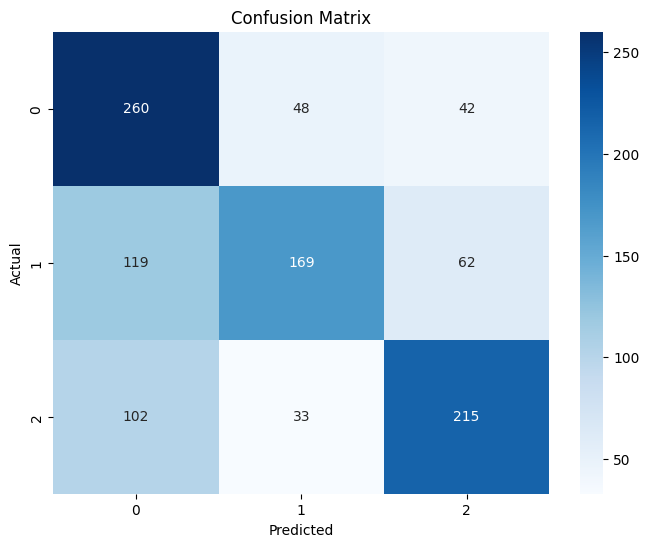

In [39]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
import seaborn as sns 
import matplotlib.pyplot as plt 

# 1. Get raw probability predictions from the model
y_pred_probabilities = model.predict(data_test)

# 2. Convert probabilities to class predictions (index of the highest probability)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# 3. Get true labels in the same format (if they are one-hot encoded)
# Check if labels_test is one-hot encoded (e.g., shape like [num_samples, 3])
if labels_test.ndim > 1 and labels_test.shape[1] > 1:
    print("True labels seem to be one-hot encoded. Converting to single dimension.")
    y_true = np.argmax(labels_test, axis=1)
else:
    # Assume labels_test is already a 1D array of class indices
    print("True labels seem to be single dimension.")
    y_true = labels_test # Use directly if already in the format [0, 1, 2, ...]

# --- Calculate and Print Metrics ---

# 4. Accuracy (should match model.evaluate if calculated the same way)
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 5. Precision, Recall, F1-score (Micro, Macro, Weighted Averages)
# 'macro': Calculate metrics for each label, and find their unweighted mean. Treats all classes equally.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). Accounts for class imbalance.
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives. Good overall measure.
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro') # Note: Micro P, R, F1 are all equal to accuracy for multi-class

print("\n--- Averaged Metrics ---")
print(f"Precision (Macro): {precision_macro:.4f}")
print(f"Recall (Macro):    {recall_macro:.4f}")
print(f"F1-score (Macro):  {f1_macro:.4f}")
print("-" * 20)
print(f"Precision (Weighted): {precision_weighted:.4f}")
print(f"Recall (Weighted):    {recall_weighted:.4f}")
print(f"F1-score (Weighted):  {f1_weighted:.4f}")
print("-" * 20)
# Micro average is usually less informative for balanced datasets but included for completeness
# print(f"Precision (Micro): {precision_micro:.4f}")
# print(f"Recall (Micro):    {recall_micro:.4f}")
# print(f"F1-score (Micro):  {f1_micro:.4f}")


# 6. Classification Report (provides per-class metrics and averages)
print("\n--- Classification Report ---")
# You might need class names if you have them, otherwise it uses 0, 1, 2...
# target_names = ['class_0_name', 'class_1_name', 'class_2_name'] # Optional: Replace with your actual class names
# print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_true, y_pred)) # Without specific names


# 7. Confusion Matrix
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)
print(cm)

# Optional: Plot Confusion Matrix for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', # fmt='d' displays integers
            # xticklabels=target_names, yticklabels=target_names # Uncomment if you have target_names
           )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
%cd /content

/content


In [96]:
model.save_weights("model.h5")

In [ ]:
!cp model.h5 /content/drive/MyDrive